In [100]:
###### Importing of Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
##### Getting the data ---
salary_data = pd.read_csv("C:/Data Science/Oct 2023/29 Oct 2023/Project - 1&2_ Simple_Reg/Project - 1&2_ Simple_Reg/Salary_Data.csv")


In [102]:
##### Getting the data ---
df = salary_data
print(df.head())
print(df.info())
print(df.shape)

   YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes
None
(30, 2)


In [103]:
#### Preprocessing and Feature Enginneering
df1 = df.copy()
df1

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [104]:
#### Exploratory Data Analysis
df1['YearsExperience'].value_counts()

3.2     2
4.0     2
1.1     1
5.3     1
10.3    1
9.6     1
9.5     1
9.0     1
8.7     1
8.2     1
7.9     1
7.1     1
6.8     1
6.0     1
5.9     1
5.1     1
1.3     1
4.9     1
4.5     1
4.1     1
3.9     1
3.7     1
3.0     1
2.9     1
2.2     1
2.0     1
1.5     1
10.5    1
Name: YearsExperience, dtype: int64

In [147]:
graph = df1[df1['Salary'] > 50000].sort_values(by = 'Salary',ascending=False)
print(graph)

    YearsExperience  Salary
28             10.3  122391
29             10.5  121872
26              9.5  116969
23              8.2  113812
27              9.6  112635
24              8.7  109431
25              9.0  105582
22              7.9  101302
21              7.1   98273
19              6.0   93940
20              6.8   91738
17              5.3   83088
18              5.9   81363
15              4.9   67938
16              5.1   66029
8               3.2   64445
10              3.9   63218
14              4.5   61111
6               3.0   60150
9               3.7   57189
13              4.1   57081
12              4.0   56957
5               2.9   56642
11              4.0   55794
7               3.2   54445


In [148]:
df1.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [149]:
corr = df1.corr()
corr

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: >

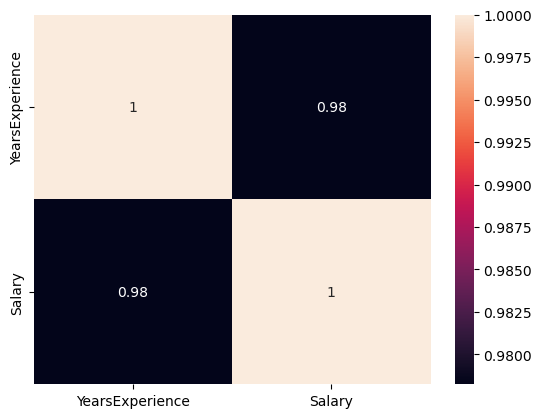

In [150]:
sns.heatmap(corr,annot=True,cbar='coolwarm')

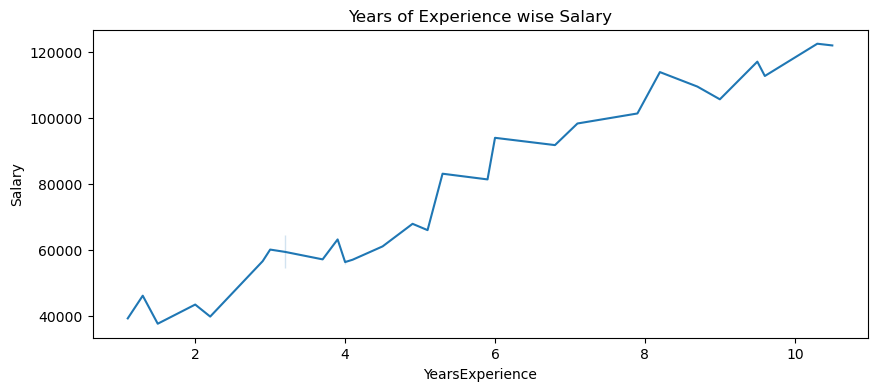

In [106]:
plt.figure(figsize=(10,4))
plt.title('Years of Experience wise Salary')
sns.lineplot(x = 'YearsExperience',y = 'Salary', data = df1)
plt.savefig("Years of Experience wise Salary 2.png")
plt.show()

### Inferance :- The graph shows that Salary increases by number of years of Experiance.

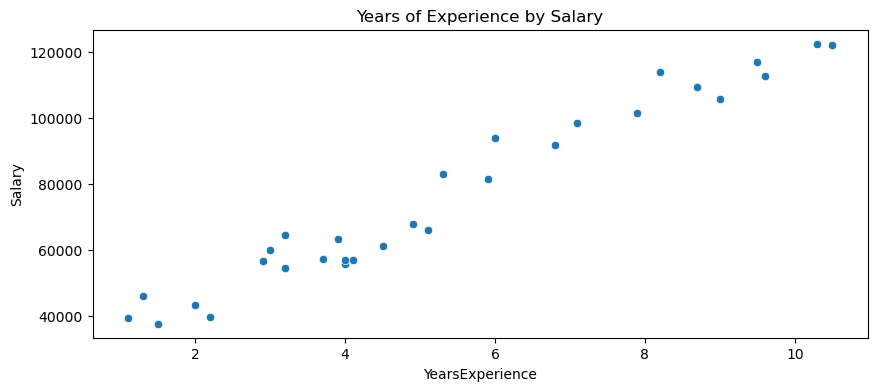

In [107]:
plt.figure(figsize=(10,4))
plt.title('Years of Experience by Salary')
sns.scatterplot(x = 'YearsExperience',y = 'Salary', data = df1)
plt.savefig("Years of Experience wise Salary2.png")
plt.show()

### Inferance :- The graph shows that more the Experiance Higher the Salary get paid.

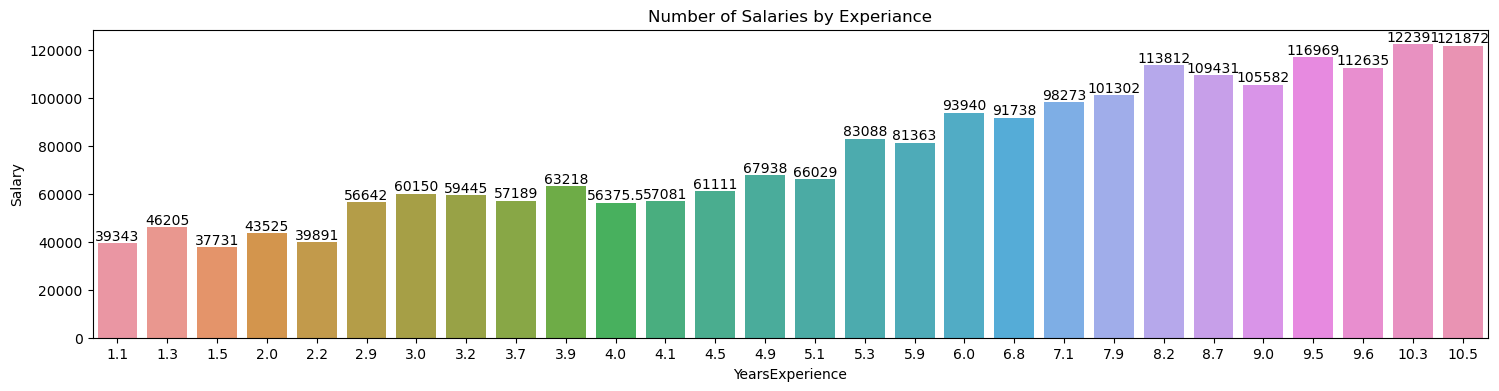

In [151]:
plt.figure(figsize=(18,4))
plt.title('Number of Salaries by Experiance')
ax = sns.barplot(x = 'YearsExperience',y = 'Salary', data = df1,errorbar=None)
for bars in ax.containers:
    ax.bar_label(bars)
plt.savefig("Years of Experience wise Salary 22.png")
plt.show()

### Inference - The graph shows that Highest Salary is 1,22,391 Rupees having an Experiance 10 Years.

0.37956024064804106
count    30.000000
mean      5.313333
std       2.837888
min       1.100000
25%       3.200000
50%       4.700000
75%       7.700000
max      10.500000
Name: YearsExperience, dtype: float64


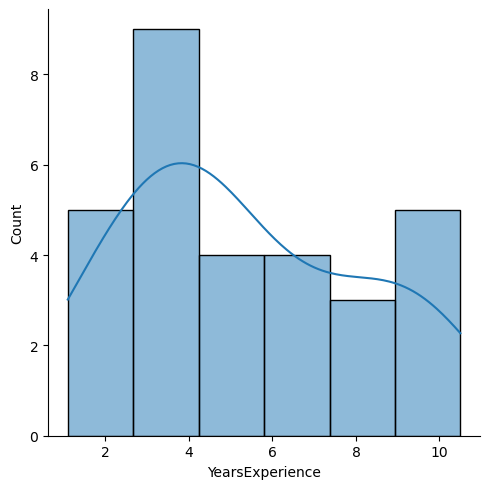

In [109]:
sns.displot(x = df1['YearsExperience'],kde = True)
print(df1['YearsExperience'].skew())
print(df1['YearsExperience'].describe())

0.35411967922959153
count        30.000000
mean      76003.000000
std       27414.429785
min       37731.000000
25%       56720.750000
50%       65237.000000
75%      100544.750000
max      122391.000000
Name: Salary, dtype: float64


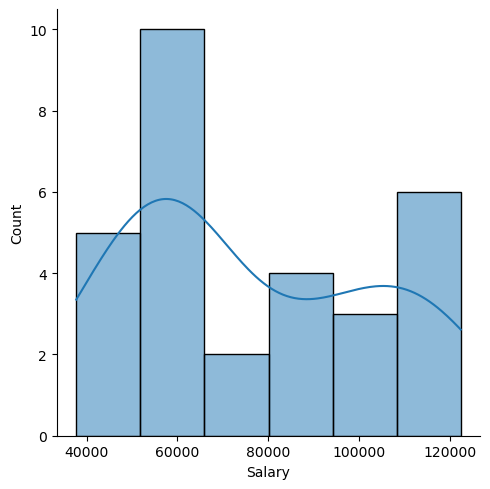

In [110]:
sns.displot(x = df1['Salary'],kde = True)
print(df1['Salary'].skew())
print(df1['Salary'].describe())

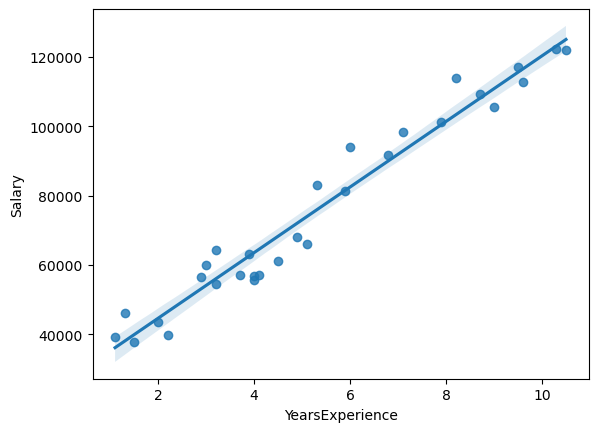

In [111]:
sns.regplot(y = 'Salary', x = 'YearsExperience', data = df1)
plt.savefig("Years of Experience wise Salary 222.png")

In [112]:
X = df1['YearsExperience'].values
X = X.reshape(-1,1)
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [113]:
y = df1['Salary'].values
y = y.reshape(-1,1)
print(y)

[[ 39343]
 [ 46205]
 [ 37731]
 [ 43525]
 [ 39891]
 [ 56642]
 [ 60150]
 [ 54445]
 [ 64445]
 [ 57189]
 [ 63218]
 [ 55794]
 [ 56957]
 [ 57081]
 [ 61111]
 [ 67938]
 [ 66029]
 [ 83088]
 [ 81363]
 [ 93940]
 [ 91738]
 [ 98273]
 [101302]
 [113812]
 [109431]
 [105582]
 [116969]
 [112635]
 [122391]
 [121872]]


In [114]:
#### Importing Scikit Learn for Algorithms
from sklearn.linear_model import LinearRegression

In [115]:
model = LinearRegression()
print(model)

LinearRegression()


In [116]:
%%time
#### Training the Model/System - By Fitting my data
model_fit = model.fit(X,y)
print(model_fit)

LinearRegression()
CPU times: total: 0 ns
Wall time: 1.02 ms


In [117]:
model_fit.coef_

array([[9449.96232146]])

In [118]:
model_fit.intercept_

array([25792.20019867])

In [119]:
predict = model_fit.predict(X)
print(predict)

[[ 36187.15875227]
 [ 38077.15121656]
 [ 39967.14368085]
 [ 44692.12484158]
 [ 46582.11730587]
 [ 53197.09093089]
 [ 54142.08716303]
 [ 56032.07962732]
 [ 56032.07962732]
 [ 60757.06078805]
 [ 62647.05325234]
 [ 63592.04948449]
 [ 63592.04948449]
 [ 64537.04571663]
 [ 68317.03064522]
 [ 72097.0155738 ]
 [ 73987.00803809]
 [ 75877.00050238]
 [ 81546.97789525]
 [ 82491.9741274 ]
 [ 90051.94398456]
 [ 92886.932681  ]
 [100446.90253816]
 [103281.8912346 ]
 [108006.87239533]
 [110841.86109176]
 [115566.84225249]
 [116511.83848464]
 [123126.81210966]
 [125016.80457395]]


In [120]:
##### Raw Data for Predictions
X1 = np.array([2,3,7])
X1
X1 = X1.reshape(-1,1)
X1

array([[2],
       [3],
       [7]])

In [121]:
model_fit.predict(X1)

array([[44692.12484158],
       [54142.08716303],
       [91941.93644885]])